In [6]:
import shap
import pickle
from transformers import AutoTokenizer
import numpy as np
import transformers
import shap
from src.plot_text import text
from src.utils import format_fts_for_plotting
from src.utils import legacy_get_dataset_info


In [2]:
with open("../shap_vals_ensemble_75.pkl", "rb") as f:
    shap_vals = pickle.load(f)
num_tab_fts = 7


## Text plot (with linebreak)

In [11]:
shap_vals[idx].values

array([[ 0.00607236, -0.00607236],
       [ 0.01382474, -0.01382474],
       [-0.04130756,  0.04130756],
       [ 0.01673537, -0.01673537],
       [-0.00060099,  0.00060099],
       [-0.02428037,  0.02428037],
       [-0.02408329,  0.02408329],
       [-0.00142574,  0.00142574],
       [-0.01306114,  0.01306114],
       [ 0.0001989 , -0.0001989 ],
       [ 0.00014753, -0.00014753],
       [-0.01091279,  0.01091279],
       [-0.00159454,  0.00159454],
       [-0.01662506,  0.01662506],
       [-0.01003676,  0.01003676],
       [-0.01476643,  0.01476643],
       [-0.02120912,  0.02120912],
       [-0.0024171 ,  0.0024171 ],
       [-0.0024171 ,  0.0024171 ],
       [-0.00258231,  0.00258231],
       [-0.005221  ,  0.005221  ],
       [-0.005221  ,  0.005221  ],
       [-0.01009154,  0.01009154],
       [-0.00988237,  0.00988237],
       [-0.00335538,  0.00335538],
       [-0.01007043,  0.01007043],
       [-0.00898443,  0.00898443],
       [-0.00898443,  0.00898443],
       [-0.01186359,

In [12]:
shap_vals[idx].base_values

array([0.46142672, 0.53857328])

In [13]:
formatted_data

array(['Year = 2009   ', 'Runtime (Minutes) = 95   ', 'Rating = 7.7   ',
       'Votes = 398972   ', 'Revenue (Millions) = 32.39   ',
       'Metascore = 76.0   ', 'Rank = 508   ', ' ', 'An ', 'off ',
       'beat ', 'romantic ', 'comedy ', 'about ', 'a ', 'woman ', 'who ',
       'doesn ', "' ", 't ', 'believe ', 'true ', 'love ', 'exists ',
       ', ', 'and ', 'the ', 'young ', 'man ', 'who ', 'falls ', 'for ',
       'her ', '. ', ' '], dtype='<U29')

In [14]:
shap_vals[idx].clustering

array([[ 2.        ,  5.        ,  0.13517135,  2.        ],
       [ 3.        ,  4.        ,  0.15662007,  2.        ],
       [ 1.        , 36.        ,  0.2669692 ,  3.        ],
       [35.        , 37.        ,  0.31091539,  5.        ],
       [ 6.        , 38.        ,  0.44813263,  6.        ],
       [ 0.        , 39.        ,  0.5       ,  7.        ],
       [ 9.        , 10.        ,  0.07142857,  2.        ],
       [17.        , 18.        ,  0.07142857,  2.        ],
       [42.        , 19.        ,  0.10714286,  3.        ],
       [ 7.        ,  8.        ,  0.07142857,  2.        ],
       [11.        , 12.        ,  0.07142857,  2.        ],
       [13.        , 14.        ,  0.07142857,  2.        ],
       [15.        , 16.        ,  0.07142857,  2.        ],
       [20.        , 21.        ,  0.07142857,  2.        ],
       [22.        , 23.        ,  0.07142857,  2.        ],
       [26.        , 27.        ,  0.07142857,  2.        ],
       [28.        , 29.

In [15]:
shap_vals[idx].hierarchical_values

array([[ 0.00607236, -0.00607236],
       [ 0.0137893 , -0.0137893 ],
       [-0.04130756,  0.04130756],
       [ 0.01369769, -0.01369769],
       [-0.00363867,  0.00363867],
       [-0.02428037,  0.02428037],
       [-0.02408329,  0.02408329],
       [ 0.        ,  0.        ],
       [-0.01163541,  0.01163541],
       [-0.00012932,  0.00012932],
       [-0.00018068,  0.00018068],
       [-0.00842706,  0.00842706],
       [ 0.00089119, -0.00089119],
       [-0.01243771,  0.01243771],
       [-0.00584941,  0.00584941],
       [-0.01054774,  0.01054774],
       [-0.01699044,  0.01699044],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [-0.00231402,  0.00231402],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [-0.00131919,  0.00131919],
       [-0.00111001,  0.00111001],
       [-0.00303981,  0.00303981],
       [-0.01007043,  0.01007043],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,

In [10]:
idx = 0

di = get_dataset_info("imdb_genre", "weighted")
formatted_data = np.array(
    format_fts_for_plotting(
        shap_vals[0].feature_names, shap_vals[idx].data[:num_tab_fts]
    )
)
text(
    shap.Explanation(
        values=shap_vals[idx].values,
        base_values=shap_vals[idx].base_values,
        data=formatted_data,
        clustering=shap_vals[idx].clustering,
        output_names=["Genre is not Drama", "Genre is Drama"],
        hierarchical_values=shap_vals[idx].hierarchical_values,
    ),
    # grouping_threshold=20,
    linebreak_after_idxs=num_tab_fts,  # linebreak_after_idx,
    text_cols=di.text_cols,
)


TypeError: 'int' object is not iterable

## Summed text vals in waterfall plot

In [1]:
from src.utils import text_ft_index_ends

/home/james/CodingProjects/TextNTabularExplanations/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


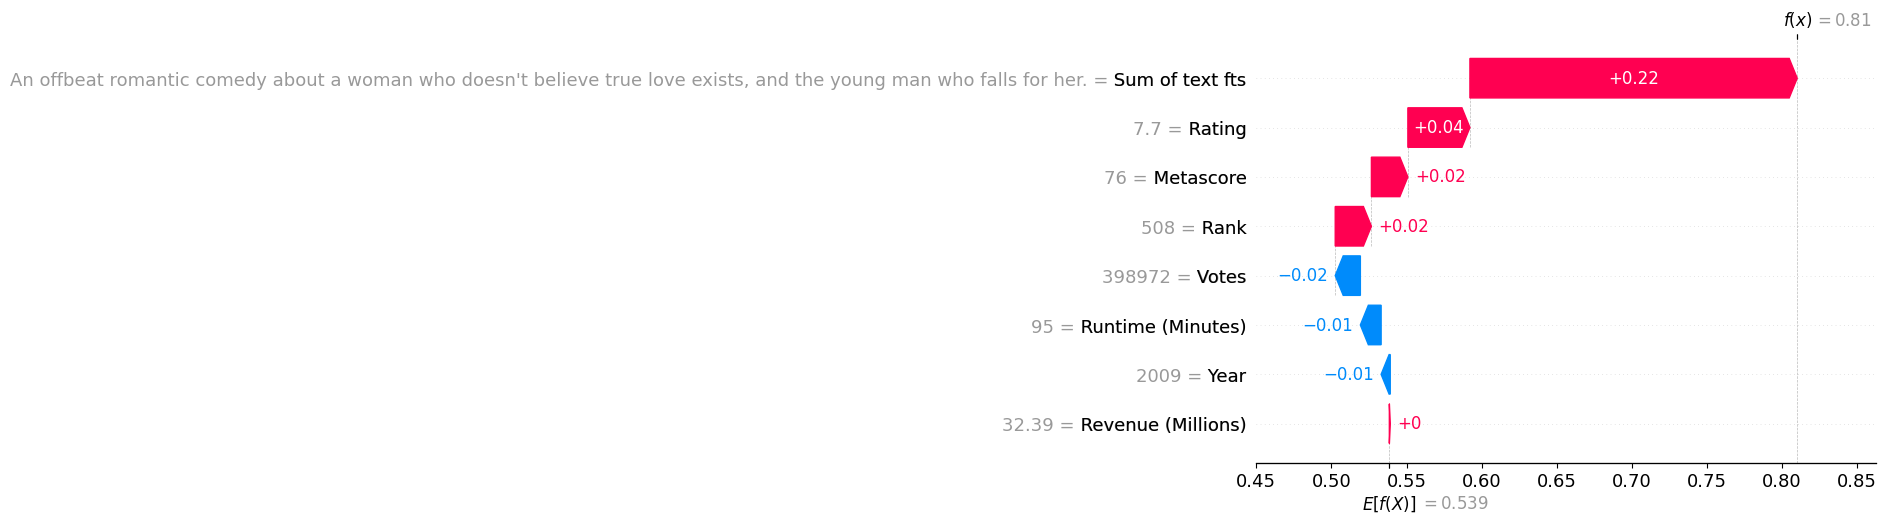

In [5]:
label = 1


shap.waterfall_plot(
    shap.Explanation(
        values=np.append(
            shap_vals[idx, :num_tab_fts, label].values,
            np.sum(shap_vals[idx, num_tab_fts:, label].values),
        ),
        base_values=shap_vals[idx, :, label].base_values,
        data=shap_vals[idx, :, label].data,
        feature_names=shap_vals[idx, :num_tab_fts, label].feature_names
        + ["Sum of text fts"],
    )
)
